# Autoregressive Model (AR)
* Relies on past period values and past periods only to predict current period values.
* A linear model, where current period values are a sum of past outcomes multiplied by a  numeric factor.
$$X_{t} = C+\varphi X_{t-1} + \varepsilon_{t}$$
Here,
$X_{t}$ = The values of X in present <br>
$X_{t-1}$ = The values of X during the previous period <br>
$\varphi$ = Any numeric constant by which we multiply the lagged variable . (Lag coefficient)
$$-1<\varphi<1$$
$\varepsilon_{t}$ = Residual. The difference between our prediction for period 't' and the correct value

## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("dataset/Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)  # converting date from string to datetime object
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]  #splitting in train and test set

## The ACF

In [6]:
df.head()

,market_value
date,
1994-01-07,3445.98
1994-01-10,3440.58
1994-01-11,3413.77
1994-01-12,3372.02
1994-01-13,3360.01


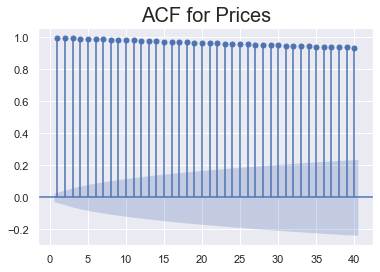

In [12]:
sgt.plot_acf(df.market_value,zero=False,lags=40)
plt.title("ACF for Prices", size = 20)
plt.show()

## The PACF

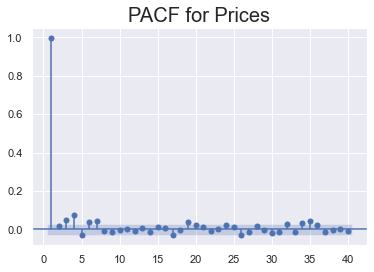

In [43]:
sgt.plot_pacf(df.market_value,zero=False,lags=40,method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

In [19]:
import warnings
warnings.filterwarnings("ignore")

## The AR(1) Model

In [20]:
model_ar = ARMA(df.market_value, order=(1,0))

**The equation:** $$X_{t} = C+\varphi X_{t-1}+ \varepsilon_{t}$$
**NOTES:**
* Calculating constant and coefficient for 1 lag. This is "simple" Autoregressive model = AR(1).
* In order=(1,0) , 1 means **how many lags we want** and 0 means **we're not taking any residual values into consideration**.

In [21]:
results_ar = model_ar.fit()

In [22]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.599
Method:                       css-mle   S.D. of innovations             59.258
Date:                Sat, 14 Aug 2021   AIC                          55251.198
Time:                        12:01:56   BIC                          55270.763
Sample:                    01-07-1994   HQIC                         55258.054
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5066.3703    482.167     10.507      0.000    4121.340    6011.401
ar.L1.market_value     0.9985      0.001   1296.964      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

**NOTES**
* **const**= C and **ar.L1.market_value**=$\varphi$
* **coef** column contains the values of the coefficients
* **z** column contains the associated **test-statistics** for significance 
* **P>|z|** column contains Pvalue. As it's zero for both, we can safely conclude that the constant (C) and 1 lag value ($\varphi$) are both **significantly different from zero**.  <br>
  **(The Null Hypothesis is, Coefficients are 0. As Pvalue is zero, we can reject the null hypothesis.So, the coefficients         are not 0. So, they're significant)**
* The last two columns contains the critical values for 95 percent confidence interval. If 0 is not a part of it we can confirm the coefficients are significant

**As Pvalue for both of the coefficents are zero, we can try fitting a more complex model for greater accuracy**

## Higher-Lag AR Models

In [23]:
model_ar_2 = ARMA(df.market_value, order=(2,0))

**The equation:** $$X_{t} = C+\varphi_{1} X_{t-1}+\varphi_{2} X_{t-2}+ \varepsilon_{t}$$
**NOTES:**
* Calculating constant and coefficient for 2 lag. This is Autoregressive model = AR(2).
* In order=(2,0) , 2 means **how many lags we want** and 0 means **we're not taking any residual values into consideration**.

In [24]:
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.871
Method:                       css-mle   S.D. of innovations             59.249
Date:                Sat, 14 Aug 2021   AIC                          55251.742
Time:                        13:49:29   BIC                          55277.827
Sample:                    01-07-1994   HQIC                         55260.883
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    495.679     10.268      0.000    4118.127    6061.155
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4620           +0.0000j           58.4620            0.5000
-----------------------------------------------------------------------------
"""

**NOTES**
* **const**= C , **ar.L1.market_value**=$\varphi_{1}$ and **ar.L2.market_value**= $\varphi_{2}$
* **Pvalue** for C and $\varphi_{1}$ are 0 . So, we can safely conclude that the constant (C) and 1 lag value ($\varphi_{1}$) are both **significantly different from zero**.<br>
  **(The Null Hypothesis is, Coefficients are 0. As Pvalues are zero, we can reject the null hypothesis.So, the coefficients are not 0. So, they're significant)**
  
* **Pvalue** for $\varphi_{2}$ is greater than 0.05 (5 percent). So,we cannot reject the null hypothesis. we can conclude that **second lag value** ($\varphi_{2}$) is **not significantly different from zero**.Therefore, we assume it's equal to 0 in Layman's term. This means that the price two days ago do not severely affect those of today.

In [25]:
model_ar_3 = ARMA(df.market_value, order=(3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27616.019
Method:                       css-mle   S.D. of innovations             59.180
Date:                Sat, 14 Aug 2021   AIC                          55242.038
Time:                        16:41:07   BIC                          55274.645
Sample:                    01-07-1994   HQIC                         55253.464
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5329.9075    630.864      8.449      0.000    4093.438    6566.377
ar.L1.market_value     0.9806      0.014     69.635      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.469      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0012           -0.0000j            1.0012           -0.0000
AR.2           -0.1853           -4.5142j            4.5180           -0.2565
AR.3           -0.1853           +4.5142j            4.5180            0.2565
-----------------------------------------------------------------------------
"""

In [26]:
model_ar_4 = ARMA(df.market_value, order=[4,0])
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Sat, 14 Aug 2021   AIC                          55217.130
Time:                        16:41:21   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    559.969      9.089      0.000    3992.122    6187.160
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.166      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9550           -2.0884j            2.2964           -0.1817
AR.3            0.9550           +2.0884j            2.2964            0.1817
AR.4           -2.6036           -0.0000j            2.6036           -0.5000
-----------------------------------------------------------------------------
"""

## LLR Test- Log Likelyhood Ratio test


In [27]:
#to use is over and over again ,we should define a function
def LLR_test(mod_1, mod_2, DF=1):  # it will take two models . DF= difference in lag number
    L1 = mod_1.fit().llf  # .llf will extract the log likelyhood value
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p
#based on Pvalue we will decide whether we should add more lag to the model or not.

## Comparing Higher-Lag AR Models

In [28]:
LLR_test(model_ar_2, model_ar_3)  #the model with fewer lag should be at first. The lag difference is 1

0.001

**NOTES:**
* As the Pvalue is less than 0.05 (5%) , we should opt the model with higher lag (AR(3)).

In [29]:
LLR_test(model_ar_3, model_ar_4)

0.0

**NOTES:**
* As the Pvalue is less than 0.05 (5%) , we should opt the model with higher lag (AR(4)).

In [30]:
model_ar_4 = ARMA(df.market_value, order=(4,0))
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary()) 
print ("LLR test: " + str(LLR_test(model_ar_3, model_ar_4)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Sat, 14 Aug 2021   AIC                          55217.130
Time:                        16:59:10   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    559.969      9.089      0.000    3992.122    6187.160
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value  

In [31]:
#Training AR(5) model and comparing with AR(4)
model_ar_5 = ARMA(df.market_value, order=(5,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary()) 
print ("LLR test: " + str(LLR_test(model_ar_4, model_ar_5)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -27600.348
Method:                       css-mle   S.D. of innovations             58.996
Date:                Sat, 14 Aug 2021   AIC                          55214.697
Time:                        17:00:15   BIC                          55260.346
Sample:                    01-07-1994   HQIC                         55230.693
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    543.579      9.363      0.000    4024.247    6155.036
ar.L1.market_value     0.9791      0.014     69.481      0.000       0.952       1.007
ar.L2.market_value  

**NOTES:**
* As the Pvalue is less than 0.05 (5%) , we should opt the model with higher lag (AR(5)).

In [32]:
#Training AR(6) model and comparing with AR(5)
model_ar_6 = ARMA(df.market_value, order=(6,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary()) 
print ("LLR test: " + str(LLR_test(model_ar_5, model_ar_6)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -27596.474
Method:                       css-mle   S.D. of innovations             58.950
Date:                Sat, 14 Aug 2021   AIC                          55208.947
Time:                        17:01:39   BIC                          55261.118
Sample:                    01-07-1994   HQIC                         55227.229
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6415    565.204      9.005      0.000    3981.861    6197.422
ar.L1.market_value     0.9803      0.014     69.604      0.000       0.953       1.008
ar.L2.market_value  

**NOTES:**
* As the Pvalue is less than 0.05 (5%) , we should opt the model with higher lag (AR(6)).

In [33]:
#Training AR(7) model and comparing with AR(6)
model_ar_7 = ARMA(df.market_value, order=(7,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary()) 
print ("LLR test: " + str(LLR_test(model_ar_6, model_ar_7)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -27591.900
Method:                       css-mle   S.D. of innovations             58.896
Date:                Sat, 14 Aug 2021   AIC                          55201.799
Time:                        17:02:28   BIC                          55260.492
Sample:                    01-07-1994   HQIC                         55222.366
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    589.606      8.632      0.000    3934.035    6245.247
ar.L1.market_value     0.9786      0.014     69.518      0.000       0.951       1.006
ar.L2.market_value  

In [34]:
#Training AR(8) model and comparing with AR(7)
model_ar_8 = ARMA(df.market_value, order=(8,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary()) 
print ("LLR test: " + str(LLR_test(model_ar_7, model_ar_8)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -27591.739
Method:                       css-mle   S.D. of innovations             58.894
Date:                Sat, 14 Aug 2021   AIC                          55203.478
Time:                        17:03:06   BIC                          55268.692
Sample:                    01-07-1994   HQIC                         55226.329
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6415    584.992      8.700      0.000    3943.079    6236.204
ar.L1.market_value     0.9790      0.014     69.476      0.000       0.951       1.007
ar.L2.market_value  

**NOTES:**
* As the Pvalue is greater than 0.05 (5%) , we shouldn't choose the model with higher lag (AR(8)). So, we will stick to AR(7) model.

In [35]:
#checking if adding 6 additional lag worth it
print ("LLR test: " + str(LLR_test(model_ar, model_ar_7,DF=6)))  #lag difference 6

LLR test: 0.0


**NOTES:**
* As the Pvalue is less than 0.05 (5%) , we should choose the model with higher lag (AR(7)).

**Overall summarization**:
* The AR(1) model served as a better predictor than AR(2) model. But higher lag model (upto AR(7)) outperformed it even with several non significant coefficients.
* It seemed that **the more lag we introduce the better our model becomes** . This is often the case when **using AR models to predict non stationary data**.
* To avoid such issues **we should use stationary time series for AR models**.

## The DF-Test 
**Checking for stationarity**

In [36]:
sts.adfuller(df.market_value)

(-1.9041551418836873,
 0.330108932770283,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

**NOTES**
* Null hypothesis is the dataset is Non-stationary
* Test statistics > critical values. So, we can't reject Null Hypothesis.
* The Pvalue says there in 33% (greater than 5%) chance of not rejecting the Null Hypothesis.

**So we failed to reject Null Hypothesis. So, the dataset is Non-stationary.<br>
As the dataset is Non-stationary, we shouldn't use AR model on this dataset for prediction. <br>
We can solve this by transforming the dataset so that it fits "stationary" assumptions.**

# Using Returns
* The percentage cahnge between the values for two consecutive periods.
* r>0 means positive return. r<0 means negative returns
* creating return out of prices $$\frac{P_{t}-P_{t-1}}{P_{t-1}}*100\%$$

In [41]:
df.market_value.pct_change?
#for period=1, it compared value with last period

In [37]:
df.market_value.pct_change(1).mul(100) #multiplying by 100 to get the percentage value.

date
1994-01-07         NaN
1994-01-10   -0.156704
1994-01-11   -0.779229
1994-01-12   -1.222988
1994-01-13   -0.356166
                ...   
2013-04-01    0.000000
2013-04-02    1.230867
2013-04-03   -1.084327
2013-04-04   -1.186397
2013-04-05   -1.487049
Freq: B, Name: market_value, Length: 5021, dtype: float64

**The value for first period is NaN because there is no period before it.**

In [39]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:] #dropping the first row with NaN value

In [40]:
sts.adfuller(df.returns)

(-12.770265719497202,
 7.798058336039616e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.7672456975)

**NOTES**
* Null hypothesis is the dataset is Non-stationary.
* Test statistics < critical values. So, we can reject Null Hypothesis.
* The Pvalue is so small. Pvalue << 5%. So, we can reject Null Hypothesis.

**So, we reject Null Hypothesis. The dataset is Stationary**

## ACF and PACF for Returns

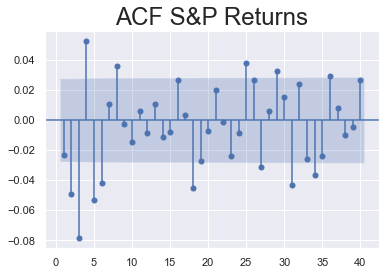

In [46]:
sgt.plot_acf(df.returns, lags=40, zero = False)
plt.title("ACF S&P Returns", size=24)
plt.show()

**NOTES:**
* Not all coefficients are positive or significant.
* Values greatly varies in magnitude instead of all being close to 1.
* By the looks of it, the first several lags are of great importance since they're significant but their coefficients are negative (with the exception of 4th lag). This points to **a trend where consecutive values move in different directions**.
* The further back we go (increase in lag number) the less relevent (significant) the coefficient values should be.

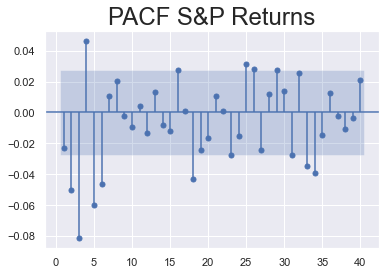

In [47]:
sgt.plot_pacf(df.returns, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P Returns", size=24)
plt.show()

## AR(1) for Returns

In [48]:
model_ret_ar_1 = ARMA(df.returns, order = (1,0))

In [49]:
results_ret_ar_1 = model_ret_ar_1.fit()

In [50]:
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sat, 14 Aug 2021   AIC                          15865.497
Time:                        18:32:20   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4387           +0.0000j           43.4387            0.5000
-----------------------------------------------------------------------------
"""

**NOTES:**
* Null Hypothesis is the coefficients are insignificant (0).
* Pvalue is greater than 0.05 (5%). Can't reject Null Hypothesis. Neither of the coefficients are significantly different from Zero. So, we can assume that they are zero.

## Higher-Lag AR Models for Returns

In [51]:
model_ret_ar_2 = ARMA(df.returns, order = (2,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Sat, 14 Aug 2021   AIC                          15854.911
Time:                        18:38:06   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

In [52]:
LLR_test(model_ret_ar_1, model_ret_ar_2)

0.0

**AS the Pvalue is less than 5%, we should choose model with higher lag values (AR(2)).**

In [53]:
model_ret_ar_3 = ARMA(df.returns, order = (3,0))
results_ret_ar_3 = model_ret_ar_3.fit()
print(results_ret_ar_3.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_2, model_ret_ar_3)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7906.738
Method:                       css-mle   S.D. of innovations              1.169
Date:                Sat, 14 Aug 2021   AIC                          15823.477
Time:                        18:39:40   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.330      0.184      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.011      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     

**AS the Pvalue is less than 5%, we should choose model with higher lag values (AR(3)).**

In [54]:
model_ret_ar_4 = ARMA(df.returns, order = (4,0))
results_ret_ar_4 = model_ret_ar_4.fit()
print(results_ret_ar_4.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_3, model_ret_ar_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -7901.330
Method:                       css-mle   S.D. of innovations              1.168
Date:                Sat, 14 Aug 2021   AIC                          15814.661
Time:                        18:40:00   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.267      0.205      -0.010       0.048
ar.L1.returns    -0.0245      0.014     -1.739      0.082      -0.052       0.003
ar.L2.returns    -0.0496      0.014     

**AS the Pvalue is less than 5%, we should choose model with higher lag values (AR(4)).**

In [60]:
model_ret_ar_5 = ARMA(df.returns, order = (5,0))
results_ret_ar_5 = model_ret_ar_5.fit()
print(results_ret_ar_5.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_4, model_ret_ar_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -7892.390
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sat, 14 Aug 2021   AIC                          15798.779
Time:                        18:44:47   BIC                          15844.428
Sample:                    01-10-1994   HQIC                         15814.775
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.348      0.178      -0.009       0.046
ar.L1.returns    -0.0217      0.014     -1.544      0.123      -0.049       0.006
ar.L2.returns    -0.0544      0.014     

**AS the Pvalue is less than 5%, we should choose model with higher lag values (AR(5)).**

In [56]:
model_ret_ar_6 = ARMA(df.returns, order = (6,0))
results_ret_ar_6 = model_ret_ar_6.fit()
print(results_ret_ar_6.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_5, model_ret_ar_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7886.945
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sat, 14 Aug 2021   AIC                          15789.890
Time:                        18:42:11   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.414      0.157      -0.007       0.045
ar.L1.returns    -0.0245      0.014     -1.740      0.082      -0.052       0.003
ar.L2.returns    -0.0523      0.014     

**AS the Pvalue is less than 5%, we should choose model with higher lag values (AR(6)).**

In [57]:
model_ret_ar_7 = ARMA(df.returns, order = (7,0))
results_ret_ar_7 = model_ret_ar_7.fit()
print(results_ret_ar_7.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_6, model_ret_ar_7)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.647
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sat, 14 Aug 2021   AIC                          15791.294
Time:                        18:42:52   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.returns    -0.0517      0.014     

**AS the Pvalue is greater than 5%, we shouldn't choose model with higher lag values (AR(7)). So, we should use the AR(6) model.**